In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [57]:
sns.set()

In [58]:
dataset = pd.read_csv('Kepler_dataset_file.csv')

In [59]:
unedited_dataset = pd.read_csv('data.csv')

In [60]:
dataset.head()

,planet_disposition,koi_pdisposition,planet_disp_confidence,flag_nTransitLk,flag_scndEvent,flag_centroidOffset,flag_ephMatch,orbital_period,transit_epoch,impact_parameter,...,equ_temp,insolation_flux,transit_sigToNoise,koi_tce_plnt_num,stellar_eff_temp,stellar_surf_gravity,stellar_radius,right_acension,declination,kepler_magnitude
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.513840,0.586,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [61]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total * 100 / len(df)
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")
    
printNullValues(dataset)

                        Total    Percent
planet_disp_confidence   1510  15.788373
transit_depth             363   3.795483
impact_parameter          363   3.795483
stellar_radius            363   3.795483
stellar_surf_gravity      363   3.795483
stellar_eff_temp          363   3.795483
transit_sigToNoise        363   3.795483
equ_temp                  363   3.795483
planetary_radius          363   3.795483
koi_tce_plnt_num          346   3.617733
insolation_flux           321   3.356336
kepler_magnitude            1   0.010456
-------------


In [62]:
unedited_dataset.shape

(9564, 50)

## ---------------------------------------------------------------------------------------
## Dealing with missing values
## ---------------------------------------------------------------------------------------

In [63]:
numerical = [col for col in dataset.columns if dataset[col].dtypes != 'O']

numerical

['planet_disp_confidence',
 'flag_nTransitLk',
 'flag_scndEvent',
 'flag_centroidOffset',
 'flag_ephMatch',
 'orbital_period',
 'transit_epoch',
 'impact_parameter',
 'transit_duration',
 'transit_depth',
 'planetary_radius',
 'equ_temp',
 'insolation_flux',
 'transit_sigToNoise',
 'koi_tce_plnt_num',
 'stellar_eff_temp',
 'stellar_surf_gravity',
 'stellar_radius',
 'right_acension',
 'declination',
 'kepler_magnitude']

In [64]:
dataset[numerical].isnull().sum()

planet_disp_confidence    1510
flag_nTransitLk              0
flag_scndEvent               0
flag_centroidOffset          0
flag_ephMatch                0
orbital_period               0
transit_epoch                0
impact_parameter           363
transit_duration             0
transit_depth              363
planetary_radius           363
equ_temp                   363
insolation_flux            321
transit_sigToNoise         363
koi_tce_plnt_num           346
stellar_eff_temp           363
stellar_surf_gravity       363
stellar_radius             363
right_acension               0
declination                  0
kepler_magnitude             1
dtype: int64

In [65]:
dataset.dropna(subset=['impact_parameter'], inplace=True)

In [66]:
dataset[numerical].isnull().sum()

planet_disp_confidence    1206
flag_nTransitLk              0
flag_scndEvent               0
flag_centroidOffset          0
flag_ephMatch                0
orbital_period               0
transit_epoch                0
impact_parameter             0
transit_duration             0
transit_depth                0
planetary_radius             0
equ_temp                     0
insolation_flux              0
transit_sigToNoise           0
koi_tce_plnt_num           255
stellar_eff_temp             0
stellar_surf_gravity         0
stellar_radius               0
right_acension               0
declination                  0
kepler_magnitude             1
dtype: int64

In [67]:
dataset.shape

(9201, 23)

In [68]:
for col in numerical:
    if dataset[col].isnull().mean()>0:
        print(col, round(dataset[col].isnull().mean(),4))

planet_disp_confidence 0.1311
koi_tce_plnt_num 0.0277
kepler_magnitude 0.0001


In [69]:
for df1 in [dataset]:
    for col in numerical:
        col_median = dataset[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [70]:
dataset[numerical].isnull().sum()

planet_disp_confidence    0
flag_nTransitLk           0
flag_scndEvent            0
flag_centroidOffset       0
flag_ephMatch             0
orbital_period            0
transit_epoch             0
impact_parameter          0
transit_duration          0
transit_depth             0
planetary_radius          0
equ_temp                  0
insolation_flux           0
transit_sigToNoise        0
koi_tce_plnt_num          0
stellar_eff_temp          0
stellar_surf_gravity      0
stellar_radius            0
right_acension            0
declination               0
kepler_magnitude          0
dtype: int64

### Engineering missing values in categorical variables <a class="anchor" id="10.2"></a>

In [71]:
# display categorical variables

categorical = [col for col in dataset.columns if dataset[col].dtypes == 'O']

categorical

['planet_disposition', 'koi_pdisposition']

In [72]:
dataset[categorical].isnull().mean()

planet_disposition    0.0
koi_pdisposition      0.0
dtype: float64

In [73]:
printNullValues(dataset)

Empty DataFrame
Columns: [Total, Percent]
Index: []
-------------


In [74]:
num_var = ['orbital_period', 'transit_epoch', 'transit_depth', 'insolation_flux', 'stellar_radius']

Text(0.5, 0.98, 'Outlier Comparison')

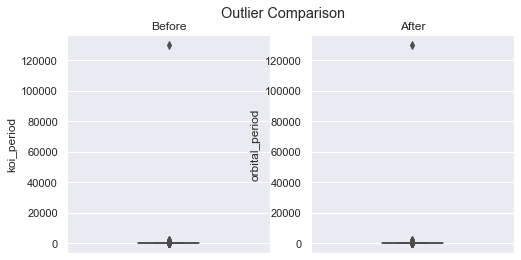

In [75]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.boxplot(y='koi_period', data=unedited_dataset, width=0.3, ax=ax1)
ax1.set_title('Before')
sns.boxplot(y='orbital_period', data=dataset, width=0.3, ax=ax2)
ax2.set_title('After')
fig.suptitle('Outlier Comparison')

Text(0.5, 0.98, 'Outlier Comparison')

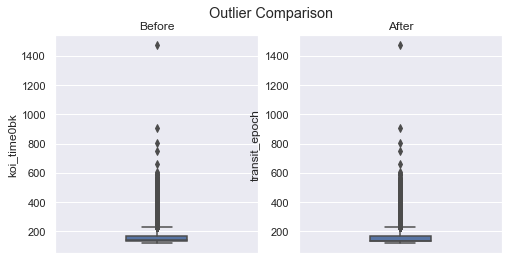

In [76]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.boxplot(y='koi_time0bk', data=unedited_dataset, width=0.3, ax=ax1)
ax1.set_title('Before')
sns.boxplot(y='transit_epoch', data=dataset, width=0.3, ax=ax2)
ax2.set_title('After')
fig.suptitle('Outlier Comparison')

Text(0.5, 0.98, 'Outlier Comparison')

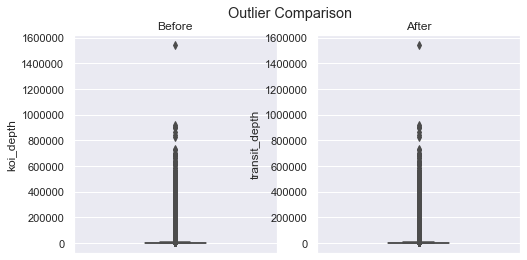

In [77]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.boxplot(y='koi_depth', data=unedited_dataset, width=0.3, ax=ax1)
ax1.set_title('Before')
sns.boxplot(y='transit_depth', data=dataset, width=0.3, ax=ax2)
ax2.set_title('After')
fig.suptitle('Outlier Comparison')

Text(0.5, 0.98, 'Outlier Comparison')

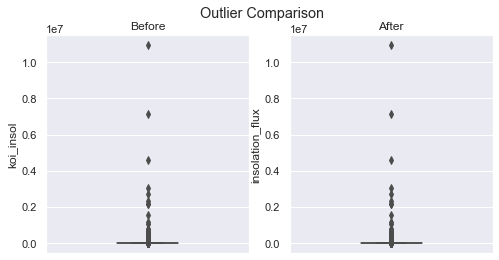

In [78]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.boxplot(y='koi_insol', data=unedited_dataset, width=0.3, ax=ax1)
ax1.set_title('Before')
sns.boxplot(y='insolation_flux', data=dataset, width=0.3, ax=ax2)
ax2.set_title('After')
fig.suptitle('Outlier Comparison')

Text(0.5, 0.98, 'Outlier Comparison')

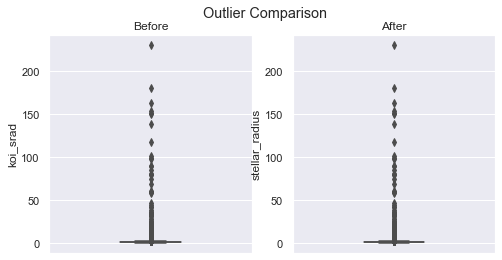

In [79]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.boxplot(y='koi_srad', data=unedited_dataset, width=0.3, ax=ax1)
ax1.set_title('Before')
sns.boxplot(y='stellar_radius', data=dataset, width=0.3, ax=ax2)
ax2.set_title('After')
fig.suptitle('Outlier Comparison')

In [ ]:
dataset = dataset.replace({'CONFIRMED': 0, 'CANDIDATE': 1, 'FALSE POSITIVE': 2})

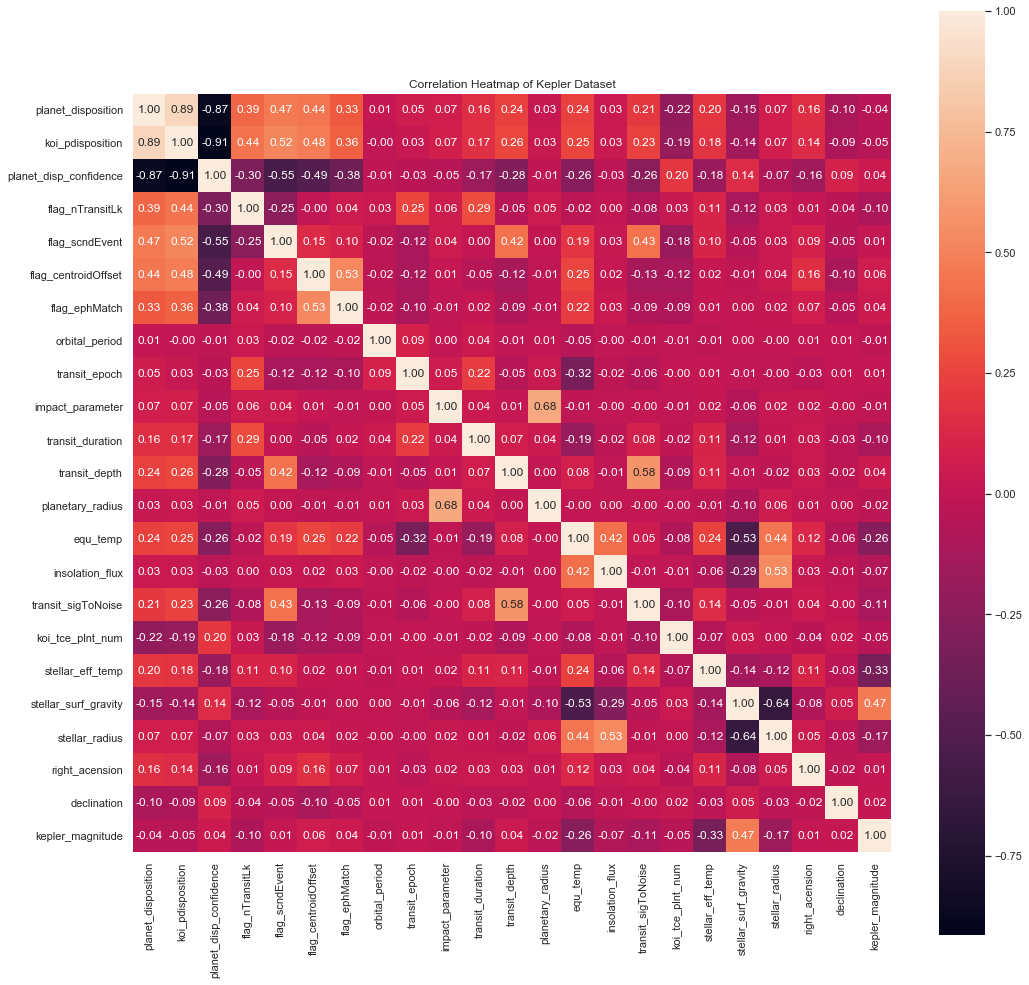

In [82]:
correlation = dataset.corr()
plt.figure(figsize=(17,17))
plt.title('Correlation Heatmap of Kepler Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_ylim(23, 0)
plt.show()

In [84]:
dataset.head()

,planet_disposition,koi_pdisposition,planet_disp_confidence,flag_nTransitLk,flag_scndEvent,flag_centroidOffset,flag_ephMatch,orbital_period,transit_epoch,impact_parameter,...,equ_temp,insolation_flux,transit_sigToNoise,koi_tce_plnt_num,stellar_eff_temp,stellar_surf_gravity,stellar_radius,right_acension,declination,kepler_magnitude
0,0,1,1.000,0,0,0,0,9.488036,170.538750,0.146,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,0,1,0.969,0,0,0,0,54.418383,162.513840,0.586,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,2,2,0.000,0,1,0,0,19.899140,175.850252,0.969,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,2,2,0.000,0,1,0,0,1.736952,170.307565,1.276,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,0,1,1.000,0,0,0,0,2.525592,171.595550,0.701,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [85]:
dataset.to_csv('Kepler_dataset_file_edited.csv', index=False, encoding='utf-8')